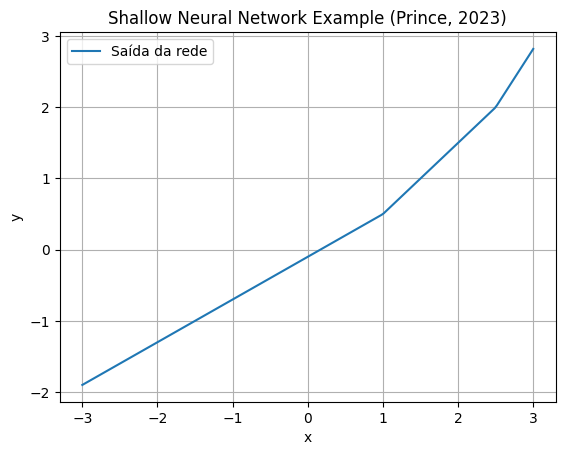

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Definição dos parâmetros
theta = np.array([[-1, 1],
                  [0.5, -0.5],
                  [-2, 0.8]])  # [θ_i0, θ_i1] para cada neurônio

phi = np.array([1.0, -1.2, 0.8])  # pesos da camada de saída
phi0 = 0.5  # bias da saída

def relu(z):
    return np.maximum(0, z)

def shallow_nn(x):
    z = theta[:, 0] + theta[:, 1] * x
    a = relu(z)
    y = phi0 + np.dot(phi, a)
    return y

# Gera dados
x_vals = np.linspace(-3, 3, 200)
y_vals = [shallow_nn(x) for x in x_vals]

# Plota
plt.plot(x_vals, y_vals, label='Saída da rede')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Shallow Neural Network Example (Prince, 2023)')
plt.grid(True)
plt.legend()
plt.show()


In [3]:
import numpy as np
import plotly.graph_objects as go

# --------------------------
# Parâmetros da rede
# --------------------------
theta = np.array([[-1, 1],
                  [0.5, -0.5],
                  [-2, 0.8]])  # [θ_i0, θ_i1]
phi = np.array([1.0, -1.2, 0.8])  # pesos da camada de saída
phi0 = 0.5  # bias da saída

# --------------------------
# Funções utilitárias
# --------------------------
def relu(z):
    return np.maximum(0, z)

def shallow_nn(x):
    # Adiciona uma dimensão extra em x para permitir broadcasting
    z = theta[:, 0:1] + theta[:, 1:2] * x[None, :]
    a = relu(z)
    y = phi0 + np.dot(phi, a)
    return z, a, y
# Gera os dados
x_vals = np.linspace(-3, 3, 300)
z, a, y = shallow_nn(x_vals)

# --------------------------
# Cria frames para cada fase
# --------------------------
frames = []

# Fase 1: Funções lineares
frames.append(go.Frame(
    data=[
        go.Scatter(x=x_vals, y=z[0], mode='lines', line=dict(color='red', dash='dot'), name='Linear 1'),
        go.Scatter(x=x_vals, y=z[1], mode='lines', line=dict(color='green', dash='dot'), name='Linear 2'),
        go.Scatter(x=x_vals, y=z[2], mode='lines', line=dict(color='blue', dash='dot'), name='Linear 3')
    ],
    name='1️⃣ Funções lineares'
))

# Fase 2: Aplicando ReLU
frames.append(go.Frame(
    data=[
        go.Scatter(x=x_vals, y=relu(z[0]), mode='lines', line=dict(color='red'), name='ReLU 1'),
        go.Scatter(x=x_vals, y=relu(z[1]), mode='lines', line=dict(color='green'), name='ReLU 2'),
        go.Scatter(x=x_vals, y=relu(z[2]), mode='lines', line=dict(color='blue'), name='ReLU 3')
    ],
    name='2️⃣ Após ReLU'
))

# Fase 3: Saída combinada
frames.append(go.Frame(
    data=[
        go.Scatter(x=x_vals, y=y, mode='lines', line=dict(color='black', width=3), name='Saída da rede')
    ],
    name='3️⃣ Saída combinada'
))

# --------------------------
# Layout e botões interativos
# --------------------------
fig = go.Figure(
    data=frames[0].data,
    layout=go.Layout(
        title='1️⃣ Funções lineares dos neurônios ocultos',
        xaxis=dict(title='x', range=[-3, 3]),
        yaxis=dict(title='Valor', range=[-2, 3]),
        updatemenus=[
            dict(
                type='buttons',
                showactive=True,
                buttons=[
                    dict(label='1️⃣ Lineares',
                         method='animate',
                         args=[[frames[0].name],
                               dict(mode='immediate', frame=dict(duration=0, redraw=True),
                                    transition=dict(duration=0))]),
                    dict(label='2️⃣ ReLU',
                         method='animate',
                         args=[[frames[1].name],
                               dict(mode='immediate', frame=dict(duration=0, redraw=True),
                                    transition=dict(duration=0))]),
                    dict(label='3️⃣ Saída',
                         method='animate',
                         args=[[frames[2].name],
                               dict(mode='immediate', frame=dict(duration=0, redraw=True),
                                    transition=dict(duration=0))])
                ],
                direction='left',
                pad={"r": 10, "t": 50},
                x=0.5, y=1.15,
                xanchor='center', yanchor='top'
            )
        ]
    ),
    frames=frames
)

# Mostra o gráfico
fig.show()


In [7]:
import numpy as np
import plotly.graph_objects as go

# ----------------------------
# Funções auxiliares
# ----------------------------
def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return (z > 0).astype(float)

# ----------------------------
# Dataset: y = sin(x)
# ----------------------------
np.random.seed(0)
x = np.linspace(-3*np.pi, 3*np.pi, 200).reshape(1, -1)
y_true = np.sin(x)

# ----------------------------
# Inicialização da rede
# ----------------------------
n_hidden = 3
theta = np.random.randn(n_hidden, 2) * 0.5  # [bias, peso]
phi = np.random.randn(n_hidden) * 0.5
phi0 = 0.0
eta = 0.01  # taxa de aprendizado

# ----------------------------
# Treinamento
# ----------------------------
epochs = 1000
history = []

for epoch in range(epochs):
    # Forward pass
    z = theta[:, 0:1] + theta[:, 1:2] * x  # (n_hidden, n_samples)
    a = relu(z)
    y_pred = phi0 + np.dot(phi, a)
    loss = np.mean((y_pred - y_true) ** 2)
    
    # Backpropagation
    dL_dy = 2 * (y_pred - y_true) / y_true.size
    dL_dphi0 = np.sum(dL_dy)
    dL_dphi = np.dot(dL_dy, a.T).ravel()
    dL_da = np.outer(phi, dL_dy)
    dL_dz = dL_da * relu_derivative(z)
    dL_dtheta1 = np.sum(dL_dz * x, axis=1)
    dL_dtheta0 = np.sum(dL_dz, axis=1)
    
    # Atualização
    phi0 -= eta * dL_dphi0
    phi -= eta * dL_dphi
    theta[:, 0] -= eta * dL_dtheta0
    theta[:, 1] -= eta * dL_dtheta1

    # Guarda parâmetros periodicamente
    if epoch % 20 == 0:
        history.append((theta.copy(), phi.copy(), phi0, loss))

print("Treinamento concluído! Perda final:", loss)

# ----------------------------
# Criação dos frames Plotly
# ----------------------------
frames = []
for i, (theta_frame, _, _, loss) in enumerate(history):
    data = []
    for j in range(n_hidden):
        z = theta_frame[j, 0] + theta_frame[j, 1] * x
        data.append(go.Scatter(
            x=x.ravel(), y=z.ravel(),
            mode='lines',
            line=dict(dash='dot'),
            name=f'z{j+1}',
            visible=True
        ))
    # Função alvo
    data.append(go.Scatter(
        x=x.ravel(), y=y_true.ravel(),
        mode='lines',
        line=dict(color='black', width=3),
        name='sin(x)'
    ))
    frames.append(go.Frame(
        data=data,
        name=f'Época {i*20} — Loss = {loss:.4f}'
    ))

# ----------------------------
# Layout e controles
# ----------------------------
fig = go.Figure(
    data=frames[0].data,
    layout=go.Layout(
        title="Evolução das funções lineares zᵢ durante o treinamento",
        xaxis=dict(title='x', range=[x.min(), x.max()]),
        yaxis=dict(title='Valor', range=[-2, 2]),
        updatemenus=[
            dict(
                type="buttons",
                showactive=True,
                x=0.5, y=1.2, xanchor="center", yanchor="top",
                buttons=[
                    dict(label="▶ Play",
                         method="animate",
                         args=[None, {"frame": {"duration": 150, "redraw": True},
                                      "fromcurrent": True, "mode": "immediate"}]),
                    dict(label="⏸ Pause",
                         method="animate",
                         args=[[None], {"frame": {"duration": 0, "redraw": False},
                                        "mode": "immediate"}])
                ]
            )
        ],
        sliders=[{
            "pad": {"b": 10, "t": 50},
            "len": 0.8,
            "x": 0.1, "y": 0,
            "steps": [
                {
                    "args": [[frame.name],
                             {"frame": {"duration": 0, "redraw": True},
                              "mode": "immediate"}],
                    "label": frame.name,
                    "method": "animate"
                }
                for frame in frames
            ]
        }]
    ),
    frames=frames
)

# ----------------------------
# Mostra a animação
# ----------------------------
fig.show()


Treinamento concluído! Perda final: 0.4640239751840363


In [ ]:
import numpy as np
import plotly.graph_objects as go

# ---------- util ----------
def tanh(x): return np.tanh(x)
def dtanh(x): return 1.0 - np.tanh(x)**2

# ---------- dataset ----------
np.random.seed(0)
x = np.linspace(-3*np.pi, 3*np.pi, 400).reshape(1, -1)     # (1,N)
y_true = np.sin(x)                                          # (1,N)

# Opcional: reescalar x para [-1,1] melhora a estabilidade da tanh
x_scaled = (x / (3*np.pi)) * 2.0  # agora em [-1,1]

# ---------- modelo: 1 -> H (tanh) -> 1 ----------
H = 32   # mais capacidade
N = x.shape[1]

# Xavier/Glorot para tanh
limit_in = np.sqrt(6/(1+H))
Theta1 = np.random.uniform(-limit_in, limit_in, size=(H, 1))   # pesos da entrada para cada neurônio
b1     = np.zeros((H, 1))

limit_out = np.sqrt(6/(H+1))
Phi     = np.random.uniform(-limit_out, limit_out, size=(1, H)) # pesos da saída
b2      = np.zeros((1, 1))

# ---------- Adam ----------
def adam_init(shape): 
    return np.zeros(shape), np.zeros(shape)

m_Theta1, v_Theta1 = adam_init(Theta1.shape)
m_b1,     v_b1     = adam_init(b1.shape)
m_Phi,    v_Phi    = adam_init(Phi.shape)
m_b2,     v_b2     = adam_init(b2.shape)

lr = 0.01
beta1, beta2 = 0.9, 0.999
eps = 1e-8

def adam_step(param, grad, m, v, t):
    m = beta1*m + (1-beta1)*grad
    v = beta2*v + (1-beta2)*(grad*grad)
    m_hat = m / (1 - beta1**t)
    v_hat = v / (1 - beta2**t)
    param -= lr * m_hat / (np.sqrt(v_hat) + eps)
    return param, m, v

# ---------- treino ----------
epochs = 3000
history = []

for epoch in range(1, epochs+1):
    # forward
    Z1 = Theta1 @ x_scaled + b1       # (H,N)
    A1 = tanh(Z1)                      # (H,N)
    y_pred = Phi @ A1 + b2             # (1,N)

    # loss (MSE)
    diff = y_pred - y_true
    loss = np.mean(diff**2)

    # backward
    dL_dy = 2*diff / N                 # (1,N)

    dL_dPhi = dL_dy @ A1.T             # (1,H)
    dL_db2  = np.sum(dL_dy, axis=1, keepdims=True)

    dL_dA1 = Phi.T @ dL_dy             # (H,N)
    dL_dZ1 = dL_dA1 * dtanh(Z1)        # (H,N)

    dL_dTheta1 = dL_dZ1 @ x_scaled.T   # (H,1)
    dL_db1     = np.sum(dL_dZ1, axis=1, keepdims=True)  # (H,1)

    # Adam updates
    t = epoch
    Theta1, m_Theta1, v_Theta1 = adam_step(Theta1, dL_dTheta1, m_Theta1, v_Theta1, t)
    b1,     m_b1,     v_b1     = adam_step(b1,     dL_db1,     m_b1,     v_b1,     t)
    Phi,    m_Phi,    v_Phi    = adam_step(Phi,    dL_dPhi,    m_Phi,    v_Phi,    t)
    b2,     m_b2,     v_b2     = adam_step(b2,     dL_db2,     m_b2,     v_b2,     t)

    # guardar estados para animar (a cada 50 épocas)
    if epoch % 50 == 0:
        # Para visualizar "z_i", vamos mostrar as pré-ativ. por neurônio (linhas) Z1[i,:]
        history.append({
            "epoch": epoch,
            "Z1": Z1.copy(),         # (H,N)
            "A1": A1.copy(),         # (H,N)
            "y_pred": y_pred.copy(), # (1,N)
            "loss": float(loss),
            "Theta1": Theta1.copy(), "b1": b1.copy(),
            "Phi": Phi.copy(), "b2": b2.copy()
        })

print(f"Treino concluído. Loss final: {loss:.6f}")

# ---------- Plotly: animação dos z_i e y_pred ----------
frames = []
for snap in history:
    epoch = snap["epoch"]; Z1 = snap["Z1"]; A1 = snap["A1"]
    yhat = snap["y_pred"]; cur_loss = snap["loss"]

    data = []

    # até 3-4 neurônios para não poluir (ou troque range(H) por range(6) p/ ver mais)
    show_k = min(6, H)
    for j in range(show_k):
        data.append(go.Scatter(
            x=x.ravel(), y=Z1[j].ravel(),
            mode='lines', line=dict(dash='dot'),
            name=f"z{j+1} (pré-ativ.)", opacity=0.5
        ))
        data.append(go.Scatter(
            x=x.ravel(), y=A1[j].ravel(),
            mode='lines', name=f"a{j+1}=tanh(z{j+1})", opacity=0.35
        ))

    # y_pred e alvo
    data.append(go.Scatter(
        x=x.ravel(), y=y_true.ravel(),
        mode='lines', line=dict(color='black', width=3),
        name='sin(x)'
    ))
    data.append(go.Scatter(
        x=x.ravel(), y=yhat.ravel(),
        mode='lines', line=dict(color='orange', width=3),
        name='saída da rede'
    ))

    frames.append(go.Frame(data=data, name=f"Época {epoch} — Loss={cur_loss:.5f}"))

fig = go.Figure(
    data=frames[0].data,
    layout=go.Layout(
        title=frames[0].name,
        xaxis=dict(title='x', range=[x.min(), x.max()]),
        yaxis=dict(title='valor', range=[-1.5, 1.5]),
        updatemenus=[dict(
            type="buttons", showactive=True, x=0.5, y=1.2, xanchor="center", yanchor="top",
            buttons=[
                dict(label="▶ Play", method="animate",
                     args=[None, {"frame": {"duration": 120, "redraw": True},
                                  "fromcurrent": True, "mode": "immediate"}]),
                dict(label="⏸ Pause", method="animate",
                     args=[[None], {"frame": {"duration": 0, "redraw": False},
                                    "mode": "immediate"}])
            ]
        )],
        sliders=[{
            "pad": {"b": 10, "t": 50}, "len": 0.8, "x": 0.1, "y": 0,
            "steps": [{"args": [[fr.name], {"frame": {"duration": 0, "redraw": True},
                                            "mode": "immediate"}],
                       "label": fr.name, "method": "animate"} for fr in frames]
        }]
    ),
    frames=frames
)

fig.show()


Treino concluído. Loss final: 0.000755
